# Lab 3 — dimensionality reduction
**Internet Analytics - Lab 3**

---

**Group:** *K*

**Names:**

* *Robin Lang*
* *Kim Lan Phan Hoang*

In [74]:
import json
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from operator import itemgetter

%matplotlib inline
plt.style.use("ggplot")

## TESTS PLEASE DELETE

``` !hdfs dfs -cat /ix/ml-20m/genome-tags.txt | tail -n 2 ```

In [2]:
movies = sc.textFile("/ix/ml-20m/movies.txt").map(json.loads)
tags = sc.textFile("/ix/ml-20m/genome-tags.txt").map(json.loads)
data = sc.textFile("/ix/ml-20m/genome-scores.txt").map(json.loads)
#tag2name = dict(data.map(itemgetter("tagId", "tag")).collect())

In [3]:
data.filter(lambda x: x["movieId"]==1 & x["tagId"]==1).take(1)

[{'movieId': 1, 'relevance': 0.025000000000000022, 'tagId': 1}]

In [21]:
tags.take(10)

[{'tag': '007', 'tagId': 1},
 {'tag': '007 (series)', 'tagId': 2},
 {'tag': '18th century', 'tagId': 3},
 {'tag': '1920s', 'tagId': 4},
 {'tag': '1930s', 'tagId': 5},
 {'tag': '1950s', 'tagId': 6},
 {'tag': '1960s', 'tagId': 7},
 {'tag': '1970s', 'tagId': 8},
 {'tag': '1980s', 'tagId': 9},
 {'tag': '19th century', 'tagId': 10}]

In [5]:
scoresByTag = data.groupBy(lambda x: x["tagId"])

In [6]:
scoresByTag.take(10)

[(408, <pyspark.resultiterable.ResultIterable at 0x7f88d580f978>),
 (954, <pyspark.resultiterable.ResultIterable at 0x7f88d580f9b0>),
 (822, <pyspark.resultiterable.ResultIterable at 0x7f88cd9b0780>),
 (384, <pyspark.resultiterable.ResultIterable at 0x7f88cd336a90>),
 (882, <pyspark.resultiterable.ResultIterable at 0x7f88cd336b00>),
 (918, <pyspark.resultiterable.ResultIterable at 0x7f88cd003128>),
 (936, <pyspark.resultiterable.ResultIterable at 0x7f88ccccc710>),
 (12, <pyspark.resultiterable.ResultIterable at 0x7f88cc996cf8>),
 (252, <pyspark.resultiterable.ResultIterable at 0x7f88cc662320>),
 (1122, <pyspark.resultiterable.ResultIterable at 0x7f88cc35a908>)]

---

**construct ratings array**

In [36]:
n_movies = movies.map(lambda x: x["movieId"]).max()
n_tags = tags.map(lambda x: x["tagId"]).max()

In [37]:
print("movies:", n_movies, "| tags:", n_tags)

movies: 131262 | tags: 1128


In [42]:
relevance_array = np.ndarray((n_tags, n_movies), dtype=float)

for i in data.toLocalIterator():
    relevance_array[i["tagId"]-1][i["movieId"]-1] = i["relevance"]

**save to file**

In [47]:
relevance_file_name = "relevance_array.npy"
np.save(relevance_file_name, relevance_array)

**open existing array file**

In [49]:
relevance_array_load = np.load(relevance_file_name)

## Exercice 3.1

### Plot the variance of each dimension / tag.

In [55]:
rel_var = []
for i in relevance_array_load:
    rel_var.append(np.var(i))

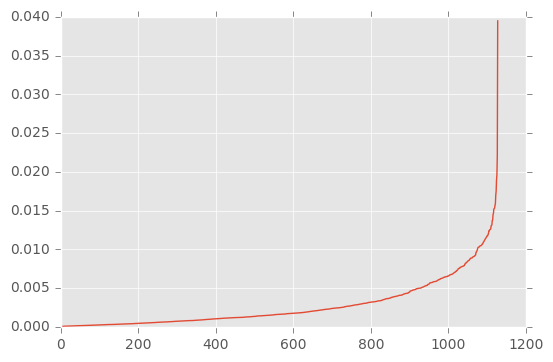

In [66]:
plt.plot(sorted(rel_var))


### Plot the eigenvalues of the covariance matrix.

In [76]:
rel_cov = np.cov(relevance_array_load)
eig_rel_cov = la.eigvals(rel_cov)

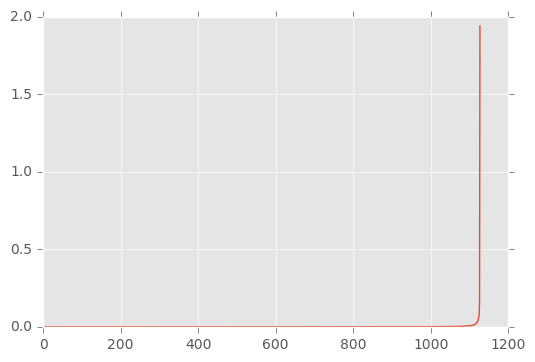

In [77]:
plt.plot(sorted(eig_rel_cov))


### Explain the implications for dimensionality reduction. For example, how many principal directions do you need to capture 2/3 of the variability in the data?

## Exercice 3.2

### For the five first principal directions, find the 10 tags that have the highest and lowest coordinates in that direction.

### What concepts would you use to describe these dimensions?

## Exercice 3.3

### Create an interactive plot that displays the 2D-projection of the movies using bokeh and its hover tool. Color the nodes by their Rotten Tomatoes score.

### Explain the coordinates of a few of the movies.

### How do the PCA directions correlate with the Rotten Tomatoes score?

In [ ]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool, ResetTool, PanTool, WheelZoomTool, SaveTool
output_notebook()